In [3]:
import pandas as pd

Load the dataset

In [4]:
dataset = pd.read_csv('C:\\Users\\jelic\\Desktop\\langAI_labs\\extrovert_introvert.csv')

In [5]:
dataset.head()

,auhtor_ID,post,extrovert
0,t2_2hrxxs28,"I have a question, if you have no doctor, how'...",0
1,t2_2hrxxs28,butt to have Covid + your cycle. I'm not sure ...,0
2,t2_2hrxxs28,through different doctors. My situation sucks ...,0
3,t2_4pxpgwz,i thought it was about the pebbleyeet guy the ...,0
4,t2_4pxpgwz,…i always end up voting wrong even as crewmate...,0


Samples number

In [6]:
len(dataset)

40452

Check the extrovert/introvert balance in the dataset

In [7]:
dataset['extrovert'].value_counts()

extrovert
0    31370
1     9082
Name: count, dtype: int64

Check and drop duplicates

In [8]:
# pd.set_option('display.max_colwidth', None)
# pd.reset_option('display.max_colwidth')

In [9]:
dupes = dataset[dataset.duplicated(keep=False)]
dupes

,auhtor_ID,post,extrovert
1235,t2_45u9zff3,ANPAN ANPAN ANPAN ANPAN ANPAN ANPAN ANPAN ANPA...,1
1258,t2_45u9zff3,ANPAN ANPAN ANPAN ANPAN ANPAN ANPAN ANPAN ANPA...,1


In [10]:
dataset = dataset.drop_duplicates()
dataset

,auhtor_ID,post,extrovert
0,t2_2hrxxs28,"I have a question, if you have no doctor, how'...",0
1,t2_2hrxxs28,butt to have Covid + your cycle. I'm not sure ...,0
2,t2_2hrxxs28,through different doctors. My situation sucks ...,0
3,t2_4pxpgwz,i thought it was about the pebbleyeet guy the ...,0
4,t2_4pxpgwz,…i always end up voting wrong even as crewmate...,0
...,...,...,...
40447,t2_8xjvf,Professional Association** We do not allow per...,0
40448,t2_8xjvf,work on the artist's behalf. Please post this ...,0
40449,t2_8xjvf,* Chill * Alternative/Alt * LoFi * Electronic ...,0
40450,t2_8xjvf,without the ability to appeal. ___ ___ If you ...,0


In [11]:
dupes_2 = dataset[dataset['post'].duplicated(keep=False)]
dupes_2

,auhtor_ID,post,extrovert


In [12]:
dataset['post'].dtype

dtype('O')

Check for the empty posts

In [13]:
empty_posts = dataset[dataset['post'].str.len() == 0]
empty_posts


,auhtor_ID,post,extrovert


In [14]:
whitespace_posts = dataset[dataset['post'].str.strip().str.len() == 0]
whitespace_posts

,auhtor_ID,post,extrovert


In [15]:
dataset['post'].isna().sum()

0

First conclusion: The dataset is unbalanced and contains no noisy samples.

********************************************************************

MESSAGE LENGTH ANALYSIS

In [16]:
!pip install matplotlib numpy nltk seaborn sklearn gensim pyldavis wordcloud textblob spacy textstat

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Text Analysis - Character level

In [17]:
import matplotlib.pyplot as plt


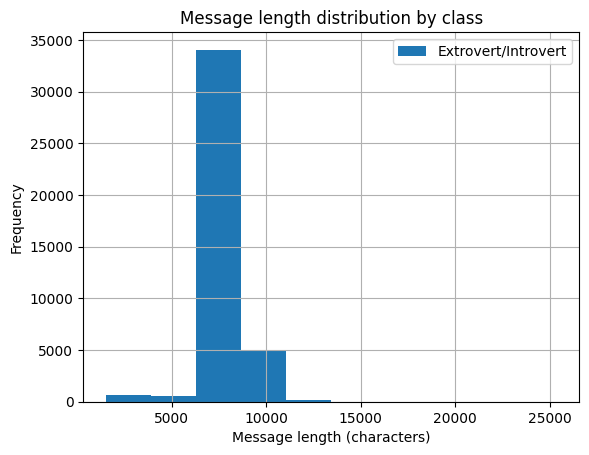

In [18]:
dataset['post'].str.len().hist(label='Extrovert/Introvert')
plt.legend()
plt.xlabel("Message length (characters)")
plt.ylabel("Frequency")
plt.title("Message length distribution by class")
plt.show()

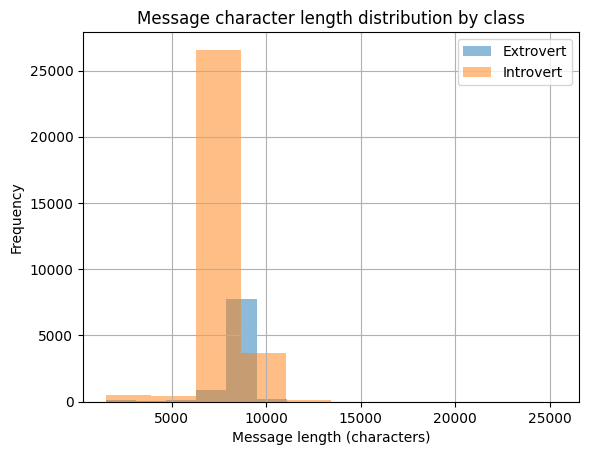

In [19]:
dataset[dataset['extrovert']==1]['post'].str.len().hist(alpha=0.5, label='Extrovert')
dataset[dataset['extrovert']==0]['post'].str.len().hist(alpha=0.5, label='Introvert')
plt.legend()
plt.xlabel("Message length (characters)")
plt.ylabel("Frequency")
plt.title("Message character length distribution by class")
plt.show()

Text analysis - word level. 

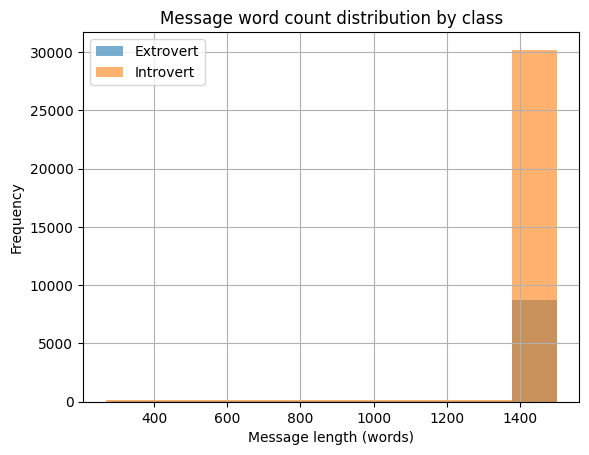

In [20]:
dataset[dataset['extrovert']==1]['post'].str.split().map(lambda x: len(x)).hist(alpha=0.6, label='Extrovert')
dataset[dataset['extrovert']==0]['post'].str.split().map(lambda x: len(x)).hist(alpha=0.6, label='Introvert')
plt.legend()
plt.xlabel("Message length (words)")
plt.ylabel("Frequency")
plt.title("Message word count distribution by class")
plt.show()

Text analysis - Average word length

In [21]:
import numpy as np

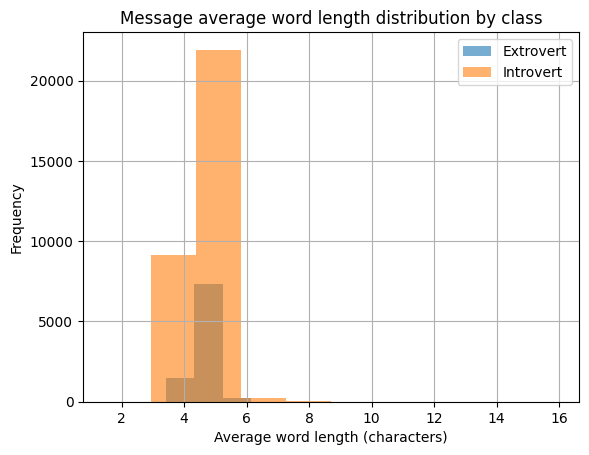

In [22]:
dataset[dataset['extrovert']==1]['post'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(alpha=0.6, label='Extrovert')
dataset[dataset['extrovert']==0]['post'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(alpha=0.6, label='Introvert')
plt.legend()
plt.xlabel("Average word length (characters)")
plt.ylabel("Frequency")
plt.title("Message average word length distribution by class")
plt.show()

Count stopwords

In [23]:
import sys
!{sys.executable} -m pip install nltk


In [24]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jelic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def count_stopwords(text_series):
    words = text_series.str.lower().str.split().explode()
    words = words[words.isin(stop_words)]
    return Counter(words)

In [26]:
extrovert_text = dataset[dataset['extrovert'] == 1]['post']
introvert_text = dataset[dataset['extrovert'] == 0]['post']

extro_counts = count_stopwords(extrovert_text)
intro_counts = count_stopwords(introvert_text)

extro_df = pd.DataFrame(extro_counts.most_common(15), columns=['word', 'count'])
intro_df = pd.DataFrame(intro_counts.most_common(15), columns=['word', 'count'])

extro_df = pd.DataFrame(extro_counts.most_common(15), columns=['word', 'count'])
intro_df = pd.DataFrame(intro_counts.most_common(15), columns=['word', 'count'])

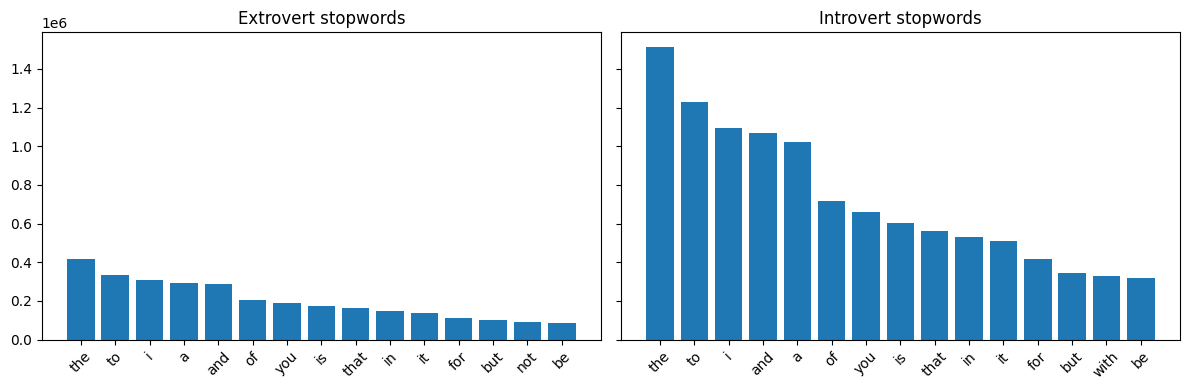

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axes[0].bar(extro_df['word'], extro_df['count'])
axes[0].set_title('Extrovert stopwords')

axes[1].bar(intro_df['word'], intro_df['count'])
axes[1].set_title('Introvert stopwords')

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


MBTI leakage

In [68]:
mbti_terms = [
    "intj","infj","istj","isfj",
    "intp","infp","istp","isfp",
    "entj","enfj","estj","esfj",
    "entp","enfp","estp","esfp",
    "mbti","introvert","extrovert","introverted","extroverted"
]

mbti_pattern = re.compile(
    r"\b(?:%s)\b" % "|".join(mbti_terms),
    flags=re.IGNORECASE
)


In [69]:
pd.crosstab(
    dataset["extrovert"],
    dataset["has_mbti_term"],
    normalize="index"
) * 100
#“Given the true class, how often do MBTI terms appear?”
#P(MBTI term∣class)
#Do introverts and extroverts talk about MBTI equally?

has_mbti_term,False,True
extrovert,,
0,59.359260,40.640740
1,51.767426,48.232574


In [70]:
pd.crosstab(
    dataset["has_mbti_term"],
    dataset["extrovert"],
    normalize="index"
) * 100
#Given that an MBTI term appears, what is the class?
#P(class∣MBTI term)
#“If someone talks about MBTI, can I guess their class?”
#***IMPORTANT***

extrovert,0,1
has_mbti_term,,
False,79.843067,20.156933
True,74.429330,25.570670


In [71]:
from scipy.stats import chi2_contingency

raw_table = pd.crosstab(
    dataset["extrovert"],
    dataset["has_mbti_term"]
)

chi2, p, _, _ = chi2_contingency(raw_table)
p


5.691114827241886e-38

In [ ]:
#p is very small, we reject the null hypothesis
#MBTI mentions are not randomly distributed
# They strongly correlate with the label
# A model can exploit this correlation
# That’s label leakage in statistical terms.

Top Words by class

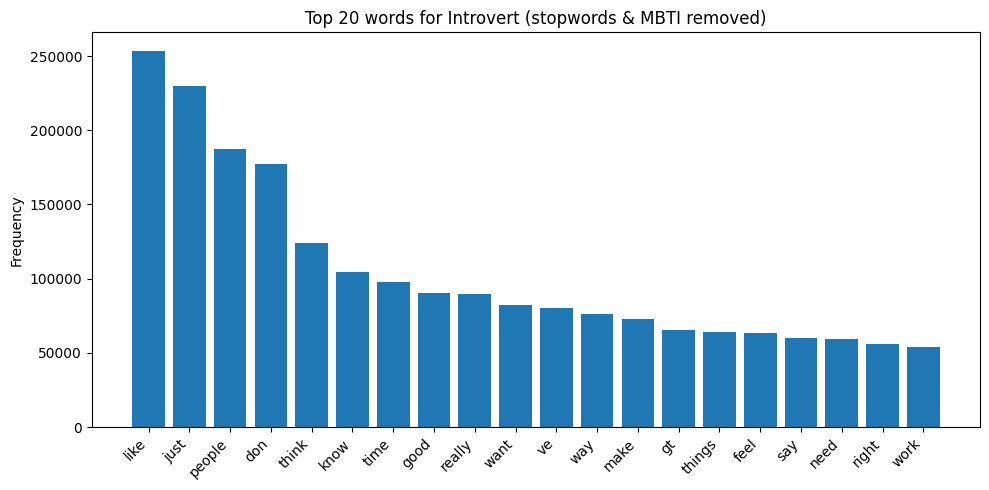

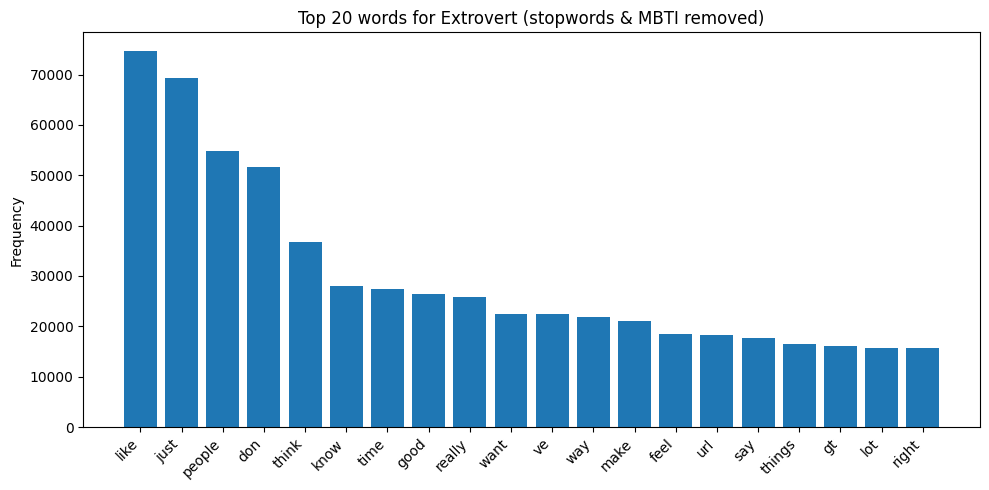

In [ ]:
import re
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

TEXT_COL = "post"          
LABEL_COL = "extrovert"

def tokenize(text: str, remove_mbti=True):
    if not isinstance(text, str):
        return []
    text = text.lower()
    tokens = re.findall(r"\b\w+\b", text)
    # remove stopwords
    tokens = [t for t in tokens if t not in ENGLISH_STOP_WORDS and len(t) > 1]
    # remove MBTI terms
    if remove_mbti:
        tokens = [t for t in tokens if not mbti_pattern.fullmatch(t)]
    return tokens

def top_words_by_class(df, top_n=20, remove_mbti=True):
    out = {}
    for cls in sorted(df[LABEL_COL].dropna().unique()):
        texts = df.loc[df[LABEL_COL] == cls, TEXT_COL].fillna("")
        counter = Counter()
        for x in texts:
            counter.update(tokenize(x, remove_mbti=remove_mbti))
        out[cls] = counter.most_common(top_n)
    return out

top = top_words_by_class(dataset, top_n=20, remove_mbti=True)

def plot_top_words(top_words, title):
    words = [w for w, _ in top_words]
    counts = [c for _, c in top_words]

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.tight_layout()
    plt.show()


for cls, words in top.items():
    cls_name = "Extrovert" if cls == 1 else "Introvert"
    plot_top_words(
        words,
        title=f"Top {len(words)} words for {cls_name} (stopwords & MBTI removed)"
    )
